In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.ticker import AutoMinorLocator, ScalarFormatter, FuncFormatter, LogLocator, MultipleLocator

In [2]:
fontsize = 8
labelsize=12

text_font = 10

tick_labelsize=10

tick_length = 5
tick_width = 1

fig_width = 3.5

fig_width_2 = 7.25

In [36]:
length_minor = tick_length*0.6
length_major = tick_length
width_minor = tick_width = 1
width_major = tick_width = 1

labelpad = 3
tickpad = 5

x_pos = 0.93
y_pos = 0.93

fontsize = labelsize

In [67]:
corner_labels = [r'$R^2/D^2$',r'$SFs \ combined$',r'$SF_{NIRSpec}$',r'$SF_{MIRI}$']

legend_text = [r'$R^2/D^2$',r'$SFs \ combined$',r'$SF_{NIRSpec}$',r'$SF_{MIRI}$']

In [72]:
samples_with_sfs = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/Retrieved_results/Retrieved_posterior_samples/W0359_samples_wo_photometry.txt")
samples_paper = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/JWST_plotting/JWST_W0359_Knots_Distpost_equal_weights.dat")[:,:-1]

In [73]:
samples_with_sfs[:,-6] = samples_with_sfs[:,-6] / 3.086e16
samples_paper[:,-6] = samples_paper[:,-6] / 3.086e16

In [74]:
r2d2_sfs = (samples_with_sfs[:,10]/samples_with_sfs[:,-6])**2
r2d2_paper = (samples_paper[:,10]/samples_paper[:,-6])**2
sf_nirspec = samples_with_sfs[:,13]
sf_miri = samples_with_sfs[:,14]
sf_combined = np.concatenate((sf_nirspec, sf_miri))

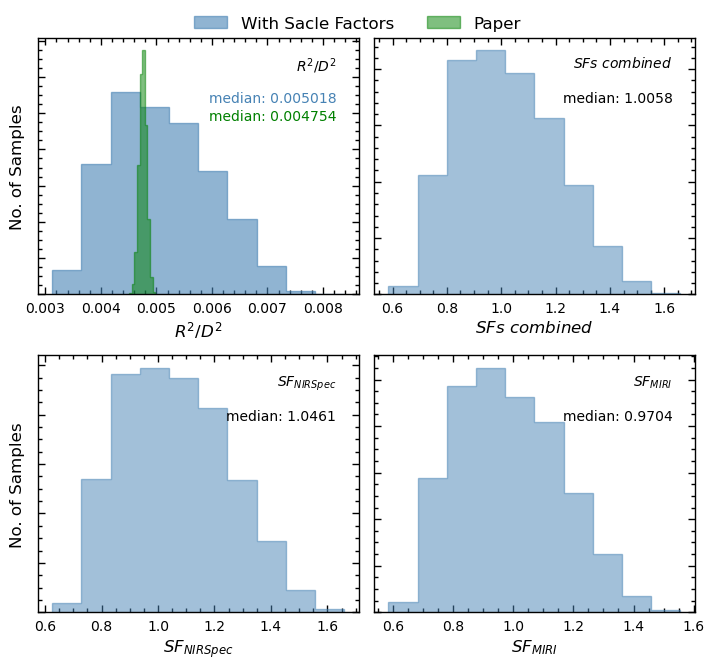

In [90]:
fig = plt.figure(figsize=(fig_width_2,fig_width_2))
plt.rc('font',family='sans-serif')
plt.rc('lines',linewidth=1)

axr2d2_paper = plt.subplot2grid(shape=(2,2), loc=(0, 0), rowspan=1)
axr2d2_sfs = plt.subplot2grid(shape=(2,2), loc=(0, 1), rowspan=1)
ax_nirspec = plt.subplot2grid(shape=(2,2), loc=(1, 0), rowspan=1)
ax_miri = plt.subplot2grid(shape=(2,2), loc=(1, 1), rowspan=1)


axr2d2_paper.hist(r2d2_sfs, histtype='step',
           stacked=False,
           fill=True,
           color='steelblue', label='With Sacle Factors', alpha=0.6)
axr2d2_paper.hist(r2d2_paper, histtype='step',
           stacked=False,
           fill=True,
           color='green', label='Paper', alpha=0.5)
axr2d2_paper.tick_params(axis='both', which='major', direction='in', top=True, right=True, labelsize=tick_labelsize, length = length_major, width = width_major, pad = tickpad)
axr2d2_paper.tick_params(axis='both', which='minor', direction='in', top=True, right=True, labelsize=tick_labelsize, length = length_minor, width = width_minor)
axr2d2_paper.xaxis.set_minor_locator(AutoMinorLocator())
axr2d2_paper.yaxis.set_minor_locator(AutoMinorLocator())


axr2d2_sfs.hist(sf_combined, histtype='step',
           stacked=True,
           fill=True,
           color='steelblue', alpha=0.5)
axr2d2_sfs.tick_params(axis='both', which='major', direction='in', top=True, right=True, labelsize=tick_labelsize, length = length_major, width = width_major, pad = tickpad)
axr2d2_sfs.tick_params(axis='both', which='minor', direction='in', top=True, right=True, labelsize=tick_labelsize, length = length_minor, width = width_minor)
axr2d2_sfs.xaxis.set_minor_locator(AutoMinorLocator())
axr2d2_sfs.yaxis.set_minor_locator(AutoMinorLocator())


ax_nirspec.hist(sf_nirspec, histtype='step',
           stacked=True,
           fill=True,
           color='steelblue', alpha=0.5)
ax_nirspec.tick_params(axis='both', which='major', direction='in', top=True, right=True, labelsize=tick_labelsize, length = length_major, width = width_major, pad = tickpad)
ax_nirspec.tick_params(axis='both', which='minor', direction='in', top=True, right=True, labelsize=tick_labelsize, length = length_minor, width = width_minor)
ax_nirspec.xaxis.set_minor_locator(AutoMinorLocator())
ax_nirspec.yaxis.set_minor_locator(AutoMinorLocator())


ax_miri.hist(sf_miri, histtype='step',
          stacked=True,
          fill=True,
          color='steelblue', alpha=0.5)
ax_miri.tick_params(axis='both', which='major', direction='in', top=True, right=True, labelsize=tick_labelsize, length = length_major, width = width_major, pad = tickpad)
ax_miri.tick_params(axis='both', which='minor', direction='in', top=True, right=True, labelsize=tick_labelsize, length = length_minor, width = width_minor)
ax_miri.xaxis.set_minor_locator(AutoMinorLocator())
ax_miri.yaxis.set_minor_locator(AutoMinorLocator())


axr2d2_paper.set_yticklabels([])
axr2d2_sfs.set_yticklabels([])
ax_nirspec.set_yticklabels([])
ax_miri.set_yticklabels([])

axr2d2_paper.set_xlabel(corner_labels[0],fontsize=fontsize, labelpad=labelpad)
axr2d2_sfs.set_xlabel(corner_labels[1],fontsize=fontsize, labelpad=labelpad)
ax_nirspec.set_xlabel(corner_labels[2],fontsize=fontsize, labelpad=labelpad)
ax_miri.set_xlabel(corner_labels[3],fontsize=fontsize, labelpad=labelpad)

axr2d2_paper.set_ylabel("No. of Samples",fontsize=fontsize)
ax_nirspec.set_ylabel("No. of Samples",fontsize=fontsize)

axr2d2_paper.text(x_pos, y_pos, legend_text[0], ha='right', va='top', transform=axr2d2_paper.transAxes, fontsize=text_font)
axr2d2_paper.text(x_pos, y_pos-0.14, 'median: '+ str(round(np.median(r2d2_sfs),6)), ha='right', va='top', transform=axr2d2_paper.transAxes, fontsize=text_font, color='steelblue')
axr2d2_paper.text(x_pos, y_pos-0.21, 'median: '+ str(round(np.median(r2d2_paper),6)), ha='right', va='top', transform=axr2d2_paper.transAxes, fontsize=text_font, color='green')

axr2d2_sfs.text(x_pos, y_pos, legend_text[1], ha='right', va='top', transform=axr2d2_sfs.transAxes, fontsize=text_font)
axr2d2_sfs.text(x_pos, y_pos-0.14, 'median: '+ str(round(np.median(sf_combined),4)), ha='right', va='top', transform=axr2d2_sfs.transAxes, fontsize=text_font)

ax_nirspec.text(x_pos, y_pos, legend_text[2], ha='right', va='top', transform=ax_nirspec.transAxes, fontsize=text_font)
ax_nirspec.text(x_pos, y_pos-0.14, 'median: '+ str(round(np.median(sf_nirspec),4)), ha='right', va='top', transform=ax_nirspec.transAxes, fontsize=text_font)

ax_miri.text(x_pos, y_pos, legend_text[3], ha='right', va='top', transform=ax_miri.transAxes, fontsize=text_font)
ax_miri.text(x_pos, y_pos-0.14, 'median: '+ str(round(np.median(sf_miri),4)), ha='right', va='top', transform=ax_miri.transAxes, fontsize=text_font)


#fig.legend(loc='lower center', fontsize=16, frameon=False,  bbox_to_anchor=(0.5, 0.435), ncol=3)
for ax in [axr2d2_paper, axr2d2_sfs, ax_nirspec, ax_miri]:
    for spine in ax.spines.values():
        spine.set_linewidth(1)

fig.legend(loc='upper center', fontsize=labelsize, frameon=False,  bbox_to_anchor=(0.5, 0.93), ncol=2)

plt.tight_layout(rect = [0., 0., 1, 0.9])

fig.savefig('/Users/harshil/Desktop/posteriors_compare.pdf', format='pdf', bbox_inches="tight")#, bbox_extra_artists=[legend_ch4])

plt.show()